In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

### Importing Dataset

In [168]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [169]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [170]:
df.shape

(158, 12)

In [171]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

It is clearly visible that there are no null values present in the dataset.

In [172]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Country and Region are the features which are of string type. All other features are of numeric type.

In [173]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Name of each variable.

In [174]:
df.info() #total count,not-null and dtype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

### Univariant, Bivariant, Multivariant Analysis

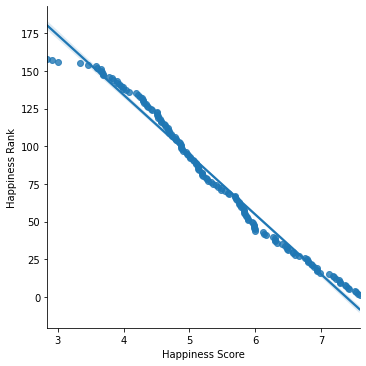

In [175]:
sns.lmplot(x="Happiness Score",y="Happiness Rank",data=df)

The above diagram clearly depicts that the Happiness Score is inversely related to Happiness Rank i.e more the Happiness Score
less will be the Happiness Rank.
We can aslo say that Happiness Score and Happiness Rank are negetively Correlated.

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

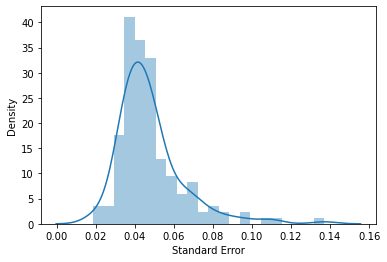

In [176]:
sns.distplot(df["Standard Error"])

From above we can state that, Standard Error is very slightly left skewed.

<AxesSubplot:xlabel='Standard Error', ylabel='Economy (GDP per Capita)'>

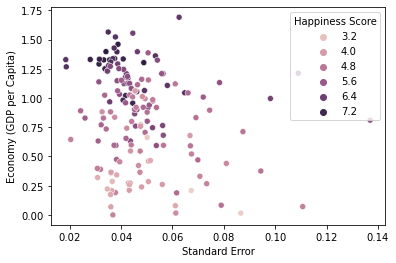

In [177]:
sns.scatterplot(data=df,y="Economy (GDP per Capita)",x="Standard Error",hue="Happiness Score")

From the above figure, we can see that less the Standard Error is, more the Economy per capita is more the Happiness Score is.

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Family'>

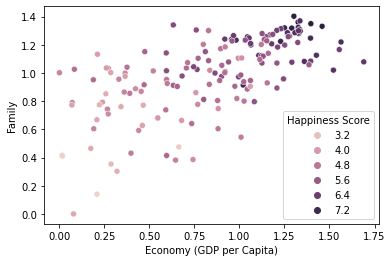

In [178]:
sns.scatterplot(data=df,x="Economy (GDP per Capita)", y="Family", hue="Happiness Score")

with the increasing Economy(GDP per capita) and Family More the Happiness Score is.

<Figure size 648x648 with 0 Axes>

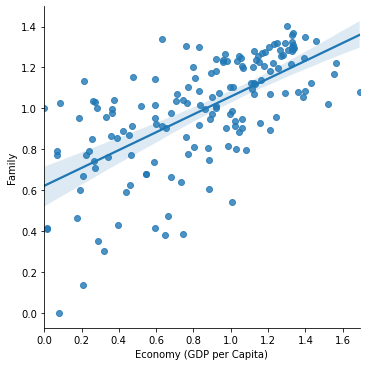

In [179]:
plt.figure(figsize=(9,9))
sns.lmplot(data=df,x="Economy (GDP per Capita)", y="Family")

We can see that there is a Linear Relationship between Economy(GDP per capita) and Family feature.

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Health (Life Expectancy)'>

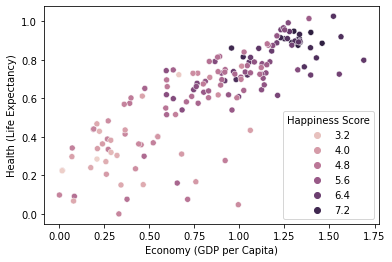

In [180]:
sns.scatterplot(data=df,x="Economy (GDP per Capita)", y="Health (Life Expectancy)", hue="Happiness Score")

With the increase in Economy(GDP per capita) and Health Life Expectancy more the Happiness Score will be.

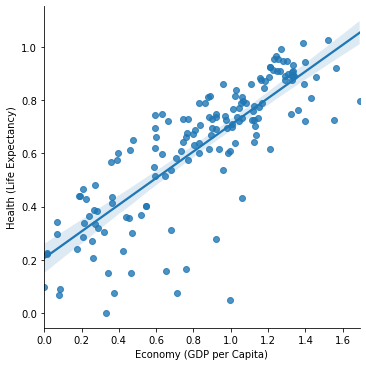

In [181]:
sns.lmplot(data=df,x="Economy (GDP per Capita)", y="Health (Life Expectancy)")

Economy and Health are positively corelated.

<AxesSubplot:xlabel='Family', ylabel='Health (Life Expectancy)'>

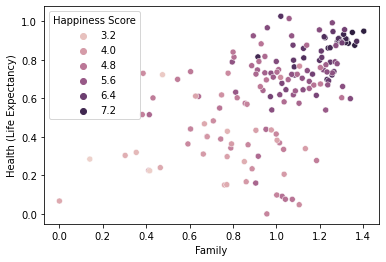

In [182]:
sns.scatterplot(data=df,y="Health (Life Expectancy)", x="Family", hue="Happiness Score")

With the increasing heath(life expenctancy) and family more the happiness score is.

<AxesSubplot:xlabel='Family', ylabel='Health (Life Expectancy)'>

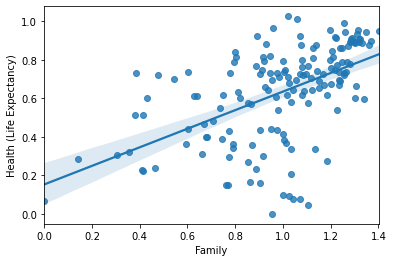

In [183]:
sns.regplot(data=df,y="Health (Life Expectancy)", x="Family")

Health( life expectancy) and family are linearLy propotional to each other.

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Freedom'>

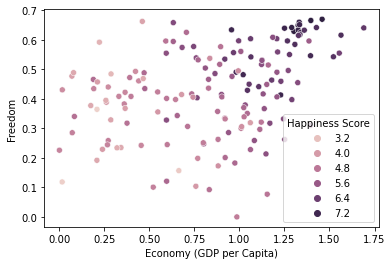

In [184]:
sns.scatterplot(data=df,x="Economy (GDP per Capita)", y="Freedom", hue="Happiness Score")

The increase in freedom and economy(GDP per capita) the happiness score also increases.

<AxesSubplot:xlabel='Family', ylabel='Freedom'>

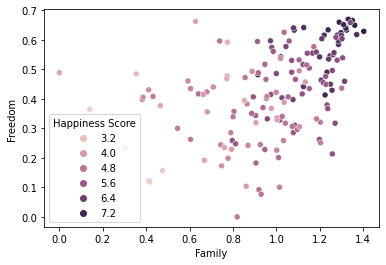

In [185]:
sns.scatterplot(data=df,x="Family", y="Freedom", hue="Happiness Score")

With the increase in family and freedom the happiness score also increases.

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Freedom'>

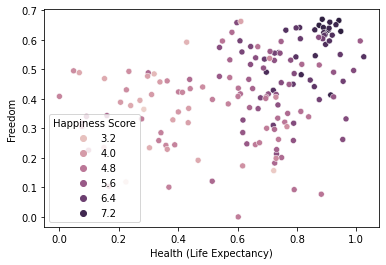

In [186]:
sns.scatterplot(data=df,x="Health (Life Expectancy)", y="Freedom", hue="Happiness Score")

From above plot we can see that with the increase in health(life expectancy) and freedom happiness score also increases. Making it tough to predict the relation.

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Freedom'>

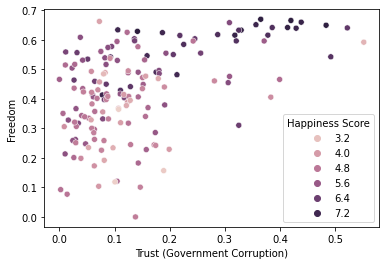

In [187]:
sns.scatterplot(data=df,y="Freedom", x="Trust (Government Corruption)", hue="Happiness Score")

From the above plot se can see that the relation between trust(government corruption), freedom and happiness score is very scattered.

<AxesSubplot:xlabel='Generosity', ylabel='Freedom'>

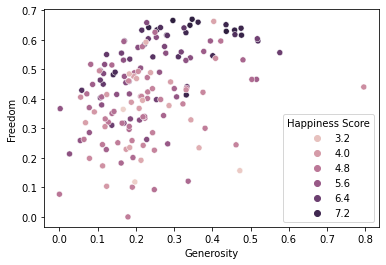

In [188]:
sns.scatterplot(data=df,x="Generosity", y="Freedom", hue="Happiness Score")

with the increasing Generosity more the Freedom more is the Happiness Score is.

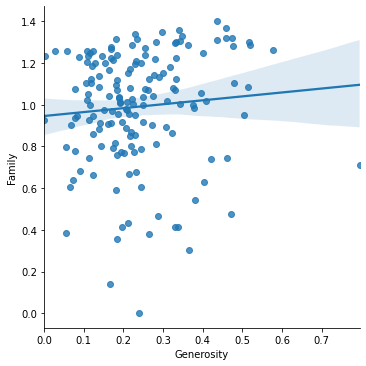

In [189]:
sns.lmplot(data=df,x="Generosity", y="Family")

The Family and generosity share a linear relationship but if we look at the slope in the above diagram it is more towards a strainght line. 

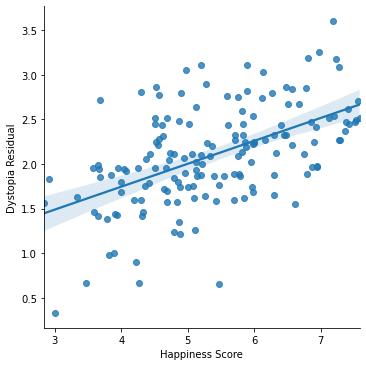

In [190]:
sns.lmplot(data=df,y="Dystopia Residual", x="Happiness Score")

Dystopia Residual and Happiness Score are sharing a healthy linear Relationship as per the above plot.

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

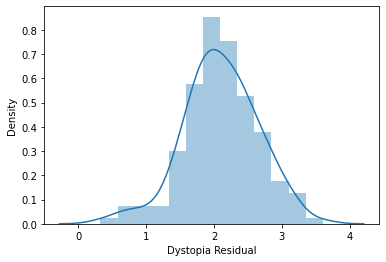

In [191]:
sns.distplot(df["Dystopia Residual"])

From the above plot we can see that Dystopia Residual is very slightly right skewed.

<AxesSubplot:xlabel='Freedom', ylabel='Dystopia Residual'>

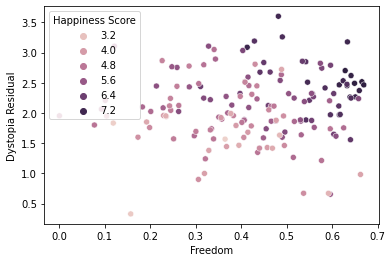

In [192]:
sns.scatterplot(data=df,y="Dystopia Residual", x="Freedom", hue="Happiness Score")

In the above plot, the relation amoung the Dystopia Residual Freedom and Happiness Score is very scattered making it tough to understand the relation.

Happiness Rank                      AxesSubplot(0.125,0.536818;0.110714x0.343182)
Happiness Score                  AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Standard Error                   AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Family                           AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Health (Life Expectancy)         AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Freedom                                AxesSubplot(0.125,0.125;0.110714x0.343182)
Trust (Government Corruption)       AxesSubplot(0.257857,0.125;0.110714x0.343182)
Generosity                          AxesSubplot(0.390714,0.125;0.110714x0.343182)
Dystopia Residual                   AxesSubplot(0.523571,0.125;0.110714x0.343182)
dtype: object

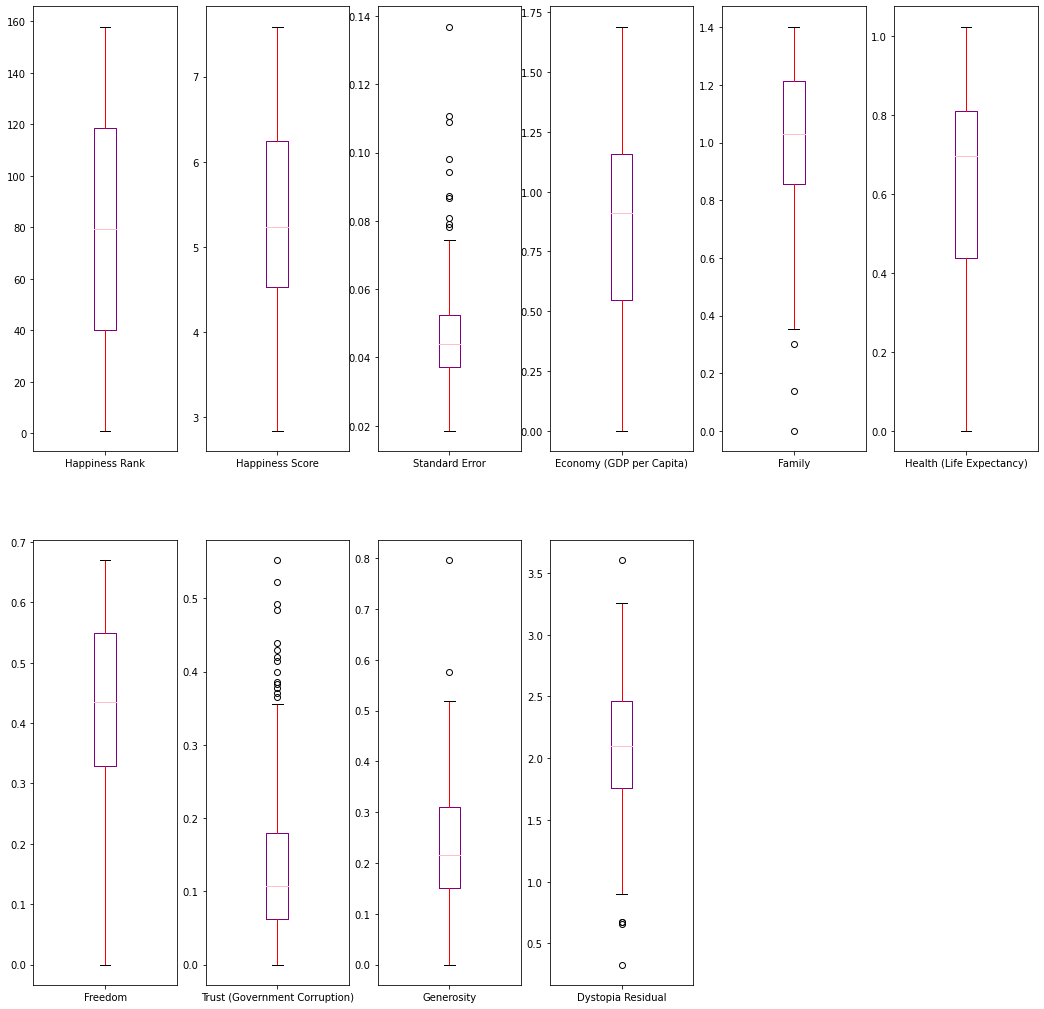

In [193]:
color=dict(boxes="Purple",whiskers="Red",medians="Pink",caps="Black")
df.plot(kind="box",subplots=True,layout=(2,6),figsize=(18,18),color=color)

In the Above Boxplot, we can see that there is the presence of outliers in the various features like Trust(Government Corruption),Dystopia Residual,Standard Error and Family.
We could also see through distribution plots for Standard Error and Dystopia Residual there was slight skewness present in these features and that was because of the presence of the outliers.
It was tough to identify what kind of relation Trust(Government Corruption) is having with other features because of the presence of outliers.

<AxesSubplot:>

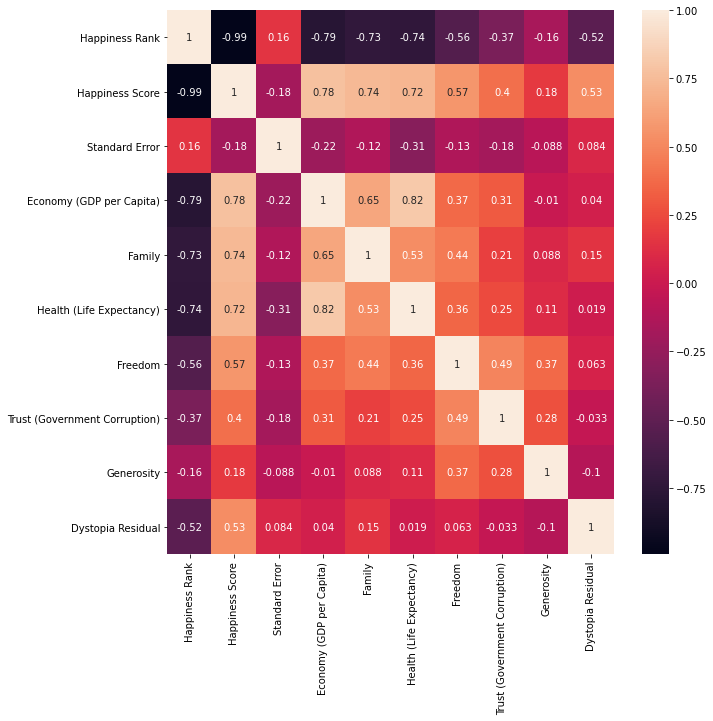

In [194]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In the above Heatmap,
1.We could see that Happiness Score and Happiness Rank are highly negetively corelated.
2.Family,Economy(GDP per capita) and Health(Life Expectancy) are positively corelated to each other and giving the maximum contribution in determining the Happiness Score.
3.Freedom and Trust(Government Corruption) are so corelated to each other.
4.Dystopia Residual is also contibuting positively in determining the Happiness Score.
5.For Standard Error, its hard to depict the relation with other features and Happiness score as its contributing negetively in depicting the Score.

### Data Preprocessing/Cleaning

In [195]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [196]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

We can see that there is skewness in some of the features.

In [197]:
df.drop("Country",axis=1,inplace=True)

In [198]:
df.drop("Region",axis=1,inplace=True)

In [199]:
df.drop("Happiness Rank", axis=1, inplace=True)

We could see that Country and Region are the string data and are not required for predicting Happiness Score we can drop thoes columns and Happiness Rank is negetively highly corelated to each other we can aslo drop Happiness Rank.

### Removing outliers

In [200]:
zp=np.abs(zscore(df))   #removing outliers present the dataset
zp
threshold=3
print(np.where(zp>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))


In [201]:
df_new=df[(zp<3).all(axis=1)]
df_new

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


The rows have reduced to 150 after removing the outliers present in the dataset.

In [202]:
df_new.skew()

Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

We can see that after removing the outliers the skewness of the parameters have reduced to much extent.

### Dividing the dataset: X(Independent) and Y(Dependent) Variables

In [203]:
x=df_new.iloc[:,1:]
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [204]:
y=df_new.iloc[:,0]
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

In [205]:
y.shape

(149,)

### VIF Calculation

In [206]:
def calc_vif(x):                #Variance Inflation Factor
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)

In [207]:
calc_vif(x)

,variables,VIF FACTOR
0,Standard Error,8.888012
1,Economy (GDP per Capita),24.700853
2,Family,30.287069
3,Health (Life Expectancy),24.614147
4,Freedom,16.744492
5,Trust (Government Corruption),3.730831
6,Generosity,6.171173
7,Dystopia Residual,14.123291


From above we can see that, the vif factors of each and every column is not that high i.e chances of multicolinearity is very less I would like to remove any column as each and feature is giving its own contribution in predicting the Happiness Score

### Performing Algorithms

In [208]:
minmse=0    #finding the best Random State
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    err=mean_squared_error(y_test,pred)
    if err>minmse:
        minmse=err
        maxrs=i
print("MSE is ",round(maxacc,2),"at random state",maxrs)

MSE is  0.0 at random state 83


In [209]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=.30,random_state=83)

### 1.Linear Regression

In [210]:
lr=LinearRegression()
lr.fit(x_train1,y_train1)
print("Cofficient is:",lr.coef_)
print("Intercept is: ",lr.intercept_)
sco=lr.score(x_train1,y_train1)
sco1=sco*100
print("Score is: ",sco1)
pred=lr.predict(x_test1)

Cofficient is: [0.00146005 1.00009163 1.00017425 0.9997372  0.9993634  1.00025357
 1.00006917 0.99996711]
Intercept is:  0.00013661183265867294
Score is:  99.99999478068389


In [211]:
mse=mean_squared_error(y_test1,pred)
print("Mean Squared Error is: ",round(mse,2))
abse=mean_absolute_error(y_test1,pred)
print("Mean Absolute Error is: ",round(abse,2))
scr=r2_score(y_test1,pred)
print("R2 Score is: ",round(scr,2))


Mean Squared Error is:  0.0
Mean Absolute Error is:  0.0
R2 Score is:  1.0


### 2.Lasso Regression

In [228]:
lst=[1,0.01,0.001,0.0001]   #finding the best value of alpha
for i in lst:
    ls=Lasso(alpha=i)
    ls.fit(x_train1,y_train1)
    ls.score(x_train1,y_train1)
    pred=ls.predict(x_test1)
    print("Mean Squared Error is: ",round(mean_squared_error(y_test1,pred),2),"for the value of alpha:",i)
    print("Mean Absolute Error is: ",round(mean_absolute_error(y_test1,pred),2),"for the value of alpha:",i)
    print("R2_Score is: ",round(r2_score(y_test1,pred),2),"for the value of alpha:",i)

Mean Squared Error is:  1.2 for the value of alpha: 1
Mean Absolute Error is:  0.95 for the value of alpha: 1
R2_Score is:  -0.01 for the value of alpha: 1
Mean Squared Error is:  0.01 for the value of alpha: 0.01
Mean Absolute Error is:  0.07 for the value of alpha: 0.01
R2_Score is:  0.99 for the value of alpha: 0.01
Mean Squared Error is:  0.0 for the value of alpha: 0.001
Mean Absolute Error is:  0.01 for the value of alpha: 0.001
R2_Score is:  1.0 for the value of alpha: 0.001
Mean Squared Error is:  0.0 for the value of alpha: 0.0001
Mean Absolute Error is:  0.0 for the value of alpha: 0.0001
R2_Score is:  1.0 for the value of alpha: 0.0001


In [231]:
ls1=Lasso(alpha=0.001)   #choosing the best alpha
ls1.fit(x_train1,y_train1)
sw=ls1.score(x_train1,y_train1)
print("Coffecient is: ",ls1.coef_)
print("Intercept is: ",ls1.intercept_)
print("Score is: ",sw)
pred=ls1.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))

Coffecient is:  [-0.          1.01323527  0.99249674  0.98111452  0.99914084  0.9504172
  0.95763376  0.99622322]
Intercept is:  0.03361428078448547
Score is:  0.9999117937521692
Mean Squared Error is: 0.0
Mean Absolute Error is: 0.01
R2 Score is: 1.0


### 3.Ridge Regression

In [232]:
lst=[1,0.01,0.001,0.0001]
for i in lst:
    lt=Ridge(alpha=i)
    lt.fit(x_train1,y_train1)
    lt.score(x_train1,y_train1)
    pred=lt.predict(x_test1)
    print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2),"for the value of alpha: ",i)
    print("Mean Absolute Error is: ",round(mean_absolute_error(y_test1,pred),2),"for the value of alpha: ",i)
    print("R2 Score is: ",round(r2_score(y_test1,pred),2),"for the value of aplha: ",i)

Mean Squared Error is: 0.0 for the value of alpha:  1
Mean Absolute Error is:  0.05 for the value of alpha:  1
R2 Score is:  1.0 for the value of aplha:  1
Mean Squared Error is: 0.0 for the value of alpha:  0.01
Mean Absolute Error is:  0.0 for the value of alpha:  0.01
R2 Score is:  1.0 for the value of aplha:  0.01
Mean Squared Error is: 0.0 for the value of alpha:  0.001
Mean Absolute Error is:  0.0 for the value of alpha:  0.001
R2 Score is:  1.0 for the value of aplha:  0.001
Mean Squared Error is: 0.0 for the value of alpha:  0.0001
Mean Absolute Error is:  0.0 for the value of alpha:  0.0001
R2 Score is:  1.0 for the value of aplha:  0.0001


In [233]:
lt1=Ridge(alpha=0.001) #choosing the best alpha
lt1.fit(x_train1,y_train1)
sw1=lt1.score(x_train1,y_train1)
print("Coffecient is: ",lt1.coef_)
print("Intercept is: ",lt1.intercept_)
print("Score is: ",sw1)
pred=lt1.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))

Coffecient is:  [-5.40855688e-04  1.00022904e+00  1.00009319e+00  9.99499868e-01
  9.99355605e-01  9.99767696e-01  9.99650965e-01  9.99933950e-01]
Intercept is:  0.0005867615819372674
Score is:  0.9999999390968021
Mean Squared Error is: 0.0
Mean Absolute Error is: 0.0
R2 Score is: 1.0


### 4.Support Vector Regressor

In [234]:
ker=["rbf","poly","linear"]    #finding the best kernel
for i in ker:
    svr=SVR(kernel=i)
    svr.fit(x_train1,y_train1)
    pred=svr.predict(x_test1)
    print("For",i,"Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
    print("For",i,"Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
    print("For",i,"R2 Score is:",round(r2_score(y_test1,pred),2))

For rbf Mean Squared Error is: 0.01
For rbf Mean Absolute Error is: 0.09
For rbf R2 Score is: 0.99
For poly Mean Squared Error is: 0.05
For poly Mean Absolute Error is: 0.17
For poly R2 Score is: 0.96
For linear Mean Squared Error is: 0.0
For linear Mean Absolute Error is: 0.05
For linear R2 Score is: 1.0


In [235]:
svr1=SVR(kernel="linear")
svr1.fit(x_train1,y_train1)
sw2=svr1.score(x_train1,y_train1)
print("Coffecient is: ",svr1.coef_)
print("Intercept is: ",svr1.intercept_)
print("Score is: ",sw2)
pred=svr1.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))

Coffecient is:  [[-0.03084789  0.96681005  1.00937752  0.95392155  0.99455905  0.79127057
   0.74992724  0.98233168]]
Intercept is:  [0.2067836]
Score is:  0.9966822866303935
Mean Squared Error is: 0.0
Mean Absolute Error is: 0.05
R2 Score is: 1.0


### Cross Validation Score

In [218]:
print(cross_val_score(svr1,x,y,cv=5).mean()) #Support Vector Regressor

0.8844975314557187


In [219]:
print(cross_val_score(lr,x,y,cv=5).mean()) #Linear Regressor

0.9999981234686345


In [220]:
print(cross_val_score(lt1,x,y,cv=5).mean()) #Ridge Regressor

0.999997656905343


In [221]:
print(cross_val_score(ls1,x,y,cv=5).mean()) #lasso Regressor

0.9927864960146543


Comparing all the above models there MSE, MAS,R2 Scores and Cross validation scores of each model we can see that Linear Regression is giving us the best results with MSE:0 MAS:0 and R2 Score:100 and Cross validation score:100
In my opnion Linear Regression is the best perfroming model for the above dataset

### Hyper Parameter Tunning using GridSearchCV

In [222]:
parameter={"fit_intercept":[True,False],
          "normalize":[True,False],
          "copy_X":[True,False],
          "n_jobs":np.arange(2,20),
          "positive":[True,False]}

In [223]:
gcv=GridSearchCV(LinearRegression(),parameter,cv=5)

In [224]:
gcv.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'normalize': [True, False],
                         'positive': [True, False]})

In [225]:
gcv.best_params_  #best parameters

{'copy_X': True,
 'fit_intercept': False,
 'n_jobs': 2,
 'normalize': True,
 'positive': True}

### Final Model

In [240]:
final=LinearRegression(copy_X=True,fit_intercept=False,n_jobs=2,normalize=True,positive=False)
final.fit(x_train1,y_train1)
print("Cofficient is:",final.coef_)
print("Intercept is: ",final.intercept_)
sco1=final.score(x_train1,y_train1)
sco2=sco*100
print("Score is: ",sco2)
pred=final.predict(x_test1)
mse=mean_squared_error(y_test1,pred)
print("Mean Squared Error is: ",round(mse,2))
abse=mean_absolute_error(y_test1,pred)
print("Mean Absolute Error is: ",round(abse,2))
scr=r2_score(y_test1,pred)
print("R2 Score is: ",round(scr,2))


Cofficient is: [0.00229243 1.00007073 1.00020997 0.99978893 0.99938284 1.00024321
 1.00008688 0.99998265]
Intercept is:  0.0
Score is:  99.99999478068389
Mean Squared Error is:  0.0
Mean Absolute Error is:  0.0
R2 Score is:  1.0


### Saving the model

In [241]:
import joblib
joblib.dump(final,"finalmod1.pkl")

['finalmod1.pkl']